Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
di=np.zeros(10)
weight=np.arange(10)
weight=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weight=weight/2.009
G=np.zeros(10)
G[0]=weight[0]
for i in range(9):
    G[i+1]=G[i]+weight[i+1]
weight=G
#print(G)
for i in range (1000):  
    d=random.random()
    #print(G-d)
    j=np.where(weight-d>=0)
    q=np.array(j).min()
    di[q]=di[q]+1
    
#print(di)
plt.bar(np.arange(10),di)
plt.xticks(np.arange(10))
plt.show()

<Figure size 640x480 with 1 Axes>

Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

In [3]:
def exquant (x,s):
    return - (math.log(1-x))/s

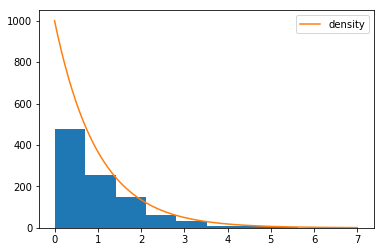

In [78]:
Sample=np.zeros(1000)
l=1
X=np.linspace(0, 7, 256)
for i in range (1000):  
    d=random.random()
    Sample[i]=exquant(d,l)
    #print(G-d)
E=1000*np.exp(-X)
plt.hist(Sample)  
plt.plot(X,E, label='density')
plt.legend()
plt.show()

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

In [6]:
def dens(x):
    return 1/(x*x+1)
    

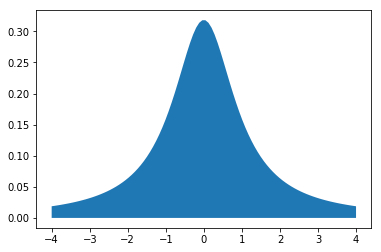

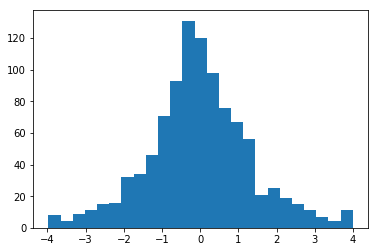

In [7]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()
k=0
Sample=np.zeros(1000)
while k<1000:
    x=random.uniform(-4,4)
    y=random.random()
    if(y<dens(x)):
        Sample[k]=x
        k=k+1
plt.hist(Sample,25)
plt.show()

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

In [26]:
def ur(x):
    return -0.8/0.6*(x-0.8)+0.1

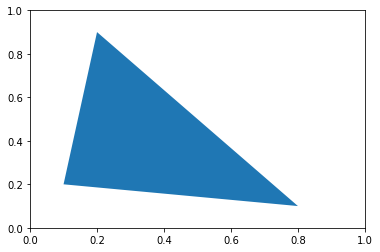

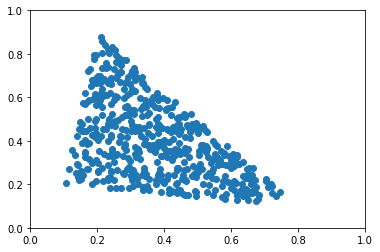

In [31]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

cos= ((0.8-0.1)*(0.2-0.1)+(0.1-0.2)*(0.7))/(math.sqrt((0.8-0.1)*(0.8-0.1)+(0.1-0.2)*(0.1-0.2))*math.sqrt((0.2-0.1)*(0.2-0.1)+(0.7)*(0.7)))
s=math.sqrt((0.8-0.1)*(0.8-0.1)+(0.1-0.2)*(0.1-0.2))
c=0.7/s

si=math.sqrt(1-c*c)
Sample=np.zeros((500, 2))

v1=np.array([0.7,-0.1])/s
v2=np.array([0.1,0.7])/s
o=np.array([0.5,0.5])
f=np.array([0.1,0.2])
for i in range (500):
    r1=random.uniform(0,s)
    r2=random.uniform(0,s)
    v3=f+r1*v1+r2*v2
    if(ur(v3[0])>v3[1]):
        Sample[i][0]=v3[0]
        Sample[i][1]=v3[1]
    else:
            t=2*o-v3
            Sample[i][0]=t[0]
            Sample[i][1]=t[1]
plt.scatter(Sample[:,0],Sample[:,1])
plt.gca().set(xlim=(0.0,1.0),ylim=(0.0,1.0))
plt.show()

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

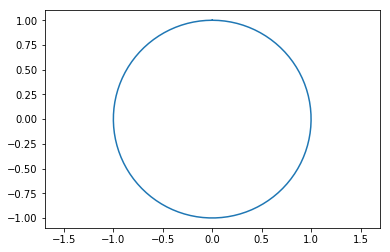

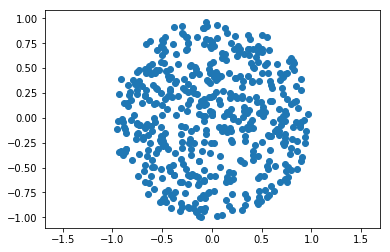

In [2]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()
Sample=np.zeros((500, 2))
for i in range (500):
    f=random.uniform(0,2 * np.pi)
    r=math.sqrt(random.random())
    Sample[i][0]=r* math.cos(f)
    Sample[i][1]=r* math.sin(f)
plt.scatter(Sample[:,0],Sample[:,1])
plt.axis('equal')
plt.show()

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

In [54]:
def randomwondering(n):
    ix0=0
    ix1=0
    Samplex=np.zeros(100)
    Sampley=np.zeros(100)
    while ix0<n/2 and ix1<n/2:
        x=random.randint(0,1)
        if(x==0):
            Samplex[ix1+ix0]=0
            ix0=ix0+1
        else:
            Samplex[ix1+ix0]=1
            ix1=ix1+1
    if(ix0==n/2):
        while ix1<n/2:
            Samplex[ix1+ix0]=1
            ix1=ix1+1
    else:
        Samplex[ix1+ix0]=0
        ix0=ix0+1
        
    ix0=0
    ix1=0
    while ix0<n/2 and ix1<n/2:
        x=random.randint(0,1)
        if(x==0):
            Sampley[ix1+ix0]=0
            ix0=ix0+1
        else:
            Sampley[ix1+ix0]=1
            ix1=ix1+1
    if(ix0==n/2):
        while ix1<n/2:
            Sampley[ix1+ix0]=1
            ix1=ix1+1
    else:
        Sampley[ix1+ix0]=0
        ix0=ix0+1
    #print(Samplex)
    #print(Sampley)
    Way=np.zeros((2,100))
    for i in range (100):
        if Samplex[i]==1:
            if Sampley[i]==1:
                Way[0][i]=1
                Way[1][i]=0
            else:
                Way[0][i]=0
                Way[1][i]=1
        else:
            if Sampley[i]==1:
                Way[0][i]=0
                Way[1][i]=-1
            else:
                Way[0][i]=-1
                Way[1][i]=0
    return Way

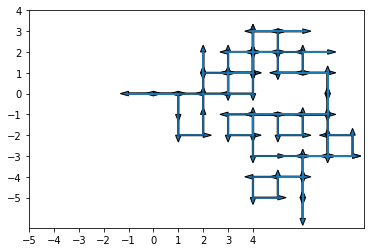

In [79]:
Way =randomwondering (100)
ramble=np.zeros((2,101))
fig, ax=plt.subplots()
for i in range (100):
    ramble[0][i+1]=ramble[0][i]+Way[0][i]
    ramble[1][i+1]=ramble[1][i]+Way[1][i]
    ax.arrow(ramble[0][i], ramble[1][i],Way[0][i] ,Way[1][i] , width=0.05, head_width=0.22)
#print(ramble)
plt.plot(ramble[0,:],ramble[1,:])
plt.xticks(np.arange(-5,5,1))
plt.yticks(np.arange(-5,5,1))
plt.show()

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

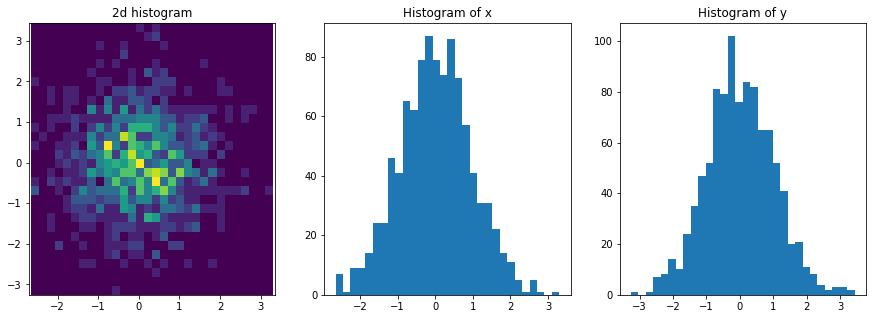

In [77]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

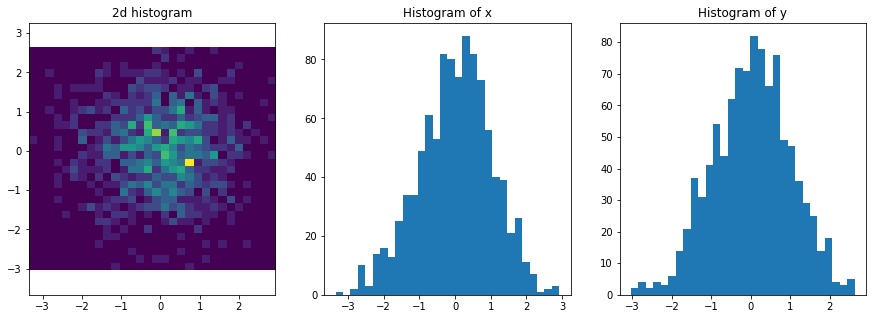

In [85]:
n=1000
j=0
x=np.zeros (n)
y=np.zeros (n)
while j<n:
    d1=random.uniform(-1,1)
    d2=random.uniform(-1,1)
    s=d1*d1+d2*d2
    if 0<s<=1:
        x[j]=d1*math.sqrt(-2*math.log(s)/s)
        y[j]=d2*math.sqrt(-2*math.log(s)/s)
        j=j+1
fig, ax = plt.subplots(1, 3, figsize=(15, 5))        
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()



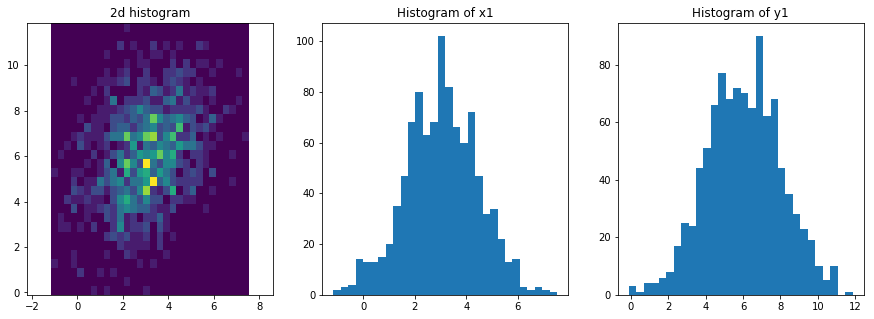

In [88]:
x1=x+y+3
y1=(1-math.sqrt(7))/2*x+(1+math.sqrt(7))/2*y +6
fig, ax = plt.subplots(1, 3, figsize=(15, 5))     
ax[0].hist2d(x1, y1, bins=30)
ax[0].axis('equal')
ax[1].hist(x1, bins=30)
ax[2].hist(y1, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x1")
ax[2].set_title("Histogram of y1")
plt.show()

Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [24]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])
B1 = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.]])

In [25]:
def gauss (n):
    x=np.zeros (n)
    y=np.zeros (n)
    j=0
    while j<n:
        d1=random.uniform(-1,1)
        d2=random.uniform(-1,1)
        s=d1*d1+d2*d2
        if 0<s<=1:
            x[j]=d1*math.sqrt(-2*math.log(s)/s)
            y[j]=d2*math.sqrt(-2*math.log(s)/s)
            j=j+1
    return x, y

In [41]:
x1, x2= gauss(1)
x3, x4= gauss(1)
x5, x6= gauss(1)
x7, x8= gauss(1)
a=np.array([x1,x2,x3,x4,x5,x6,x7,x8])
A= np.linalg.cholesky(B1)
#print(A)
a=A.dot(a)
#print(a)
x9=-(a[4]+a[0])
b=np.zeros(9)
for i in range (8):
    b[i]=a[i]
b[8]=x9
print(b)
#q=A.dot(np.transpose(A))
#print (q)

[-0.7542936   1.2609128  -1.11050745  0.39950099  1.52431481 -0.14754731
  1.67789146  0.16488678 -0.77002121]


При разложении матрицы ковариаций методом Холецкого мы получим матрицу преобразований стандартного гауссовского вектора. Если матрица вырождена в холецкого раскладываем наибольшую невырожденную подматрицу, остальные с.в. будут комбинациями полученных первых. Домножаем матрицу из Холецкого на вектор и получаем искомый вектор из нужного многомерного гауссовского распределения.

С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

In [104]:
def circle(x):
    return math.sqrt(1-x*x)

In [111]:
n = 3000000
u1, u2 = np.random.rand(2,n)

k=0
for i in range (n):
    if (circle(u1[i])>u2[i]):
        k=k+1
print(4*k/n)        

3.141224


Используя стандартные статистические методы для корень из n асимптотически гауссовской оценки для мат.ожидания индикатора попадания точки в четверть круга, при желаемом доверии в  0.99 получим что теоретически нужно n > (1000 * pi/2 * (1-pi/4) * 2.576)^2 = 754 046 . Однако на практике, этого мало, т.к. числа не случайны, а псевдослучайны, поэтому следует взять 3000000

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [6]:
def C(n,k):
    return math.factorial(n)/(math.factorial(k) *math.factorial(n-k))
def stirling (k,n):
    a=0
    if k==0 and n ==0:
        return 1
    if k==0:
        return 0
    if n==1:
        return 1
    for i in range (n):
        a=a+pow((-1),i)*C(n,i)*pow((n-i),k)
    a=a/math.factorial(n)
    return a
    
def B(n):
    b=0
    if n==0:
        return 1
    else:
        for i in range (n):
            b=b+stirling (n,i)
        return b+1

In [11]:
n=100
def div(n):
    a=np.zeros(n)
    d=np.arange(n)
    d=d+1
    for i in range (n):
        a[i]=((i+1)**n)/(math.factorial(i+1)*math.e*B(n))    
    K=np.sum(a)
    a[n-1]=a[n-1]+1-K
    K=np.sum(a)
    K=np.random.choice(d,p=a)
    print(K)
    f=np.arange(K)
    f=f+1
    Col=np.random.choice(f,n)
    for i in range (K):
        mask = Col==i+1
        print (d[mask])
    return K
p=0
for i in range (10):
    p=p+div(100)
p=p/10
print(p)

31
[28 96]
[13 53 57 70]
[ 4 20 22 31 32 43 94]
[55 92]
[11 27 29 37 85]
[52]
[ 17  18  47  98 100]
[ 2 39 42 65 88]
[14 24 62 91]
[23 38 83]
[16 45 72 76]
[81 86 89]
[48 49 73 99]
[60 95]
[ 6 58]
[10 26 68 78 79]
[1]
[50 69]
[ 7 30 44 77 84]
[5]
[25 41 54 75]
[ 9 15 66 71 87]
[59 63]
[61 74 82 93]
[64]
[40 46 97]
[56 67 80]
[ 8 33 36]
[19 35 51 90]
[12 34]
[ 3 21]
36
[99]
[74]
[27 57 85 91]
[19 28 32 75]
[61 66]
[ 3 41 55 71 94]
[21 90]
[20 54 63]
[87]
[34 81]
[ 70 100]
[36 78]
[18 23 53 79 97 98]
[ 1 86]
[13 14 39 60]
[64]
[26 35 49 65 67]
[15 22 25 73]
[11 17 56]
[33 51 69]
[]
[76 88]
[ 6 92]
[24 29 45 84]
[10 40 43 89]
[96]
[ 4 42]
[30 31 52]
[ 9 37 68 72 83]
[12 44 46 59]
[ 5 16 38 50 58 62]
[47 77]
[ 7 80 93 95]
[ 2 82]
[]
[ 8 48]
29
[ 3 15 27 52 66]
[ 5  9 16 31 47 89]
[14 44]
[25 53 58 72 80]
[42 64]
[29 32 41 69 70]
[56 76 83 93]
[28]
[43 49 68]
[ 2  6 17 21 23 38 67 71 95]
[ 1 35 39 99]
[51 77 90]
[57 75 87 88]
[12]
[55 94]
[ 4  7 37 45]
[60]
[ 26  30  81 100]
[48 96]
[10 59]

В среднем получилось 29 множеств.